# Assignment 1 (19202750)

## 1. Network construction (a)

I downloaded 2 personal datasets with the help of my student number: 19202750. Each set is represented as a JSON file, about the actors and movies in which they starred.

In [536]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [537]:
#Parsing JSON data of first data set
json_file = open("19202750-dataset1.json","r")
data1 = json.load( json_file )
json_file.close()

In [538]:
#Parsing JSON data of second data set
json_file = open("19202750-dataset2.json","r")
data2 = json.load( json_file )
json_file.close()

In that assingment the most useful Python library is NetworkX. I create graphs: g1, g2. They should illustrate network1, network2 in the following steps.

In [539]:
g1 = nx.Graph()
g2 = nx.Graph()

#Here I add nodes to the graph g1 (nodes are actors). 
#Initially I decided to construct nodes of graphs using stars' 'id', 
#as it is unique identifier, which is more convenient to use that 'name'.

#for future configurations I create dictionries: name_dict_1 and name_dict_2
#for connectivity with names and id's of actors.
name_dict_1 = {}

#Dictionaries movie_dict_1 and movie_dict2 I create 
#to simply have an access to all movies of certain actor.
movie_dict_1 = {}

#Considering about the fact that movies may repeat I decided to use set - 
#as a representation of full number of movies.
set_movies_1 = set()

#This piece of code is used for g1:
for char in data1:
    name_dict_1[ char["id"] ] = char["name"]  
    g1.add_node( char["id"] )
    star_id_1 = char['id']
    set_star_1=set()
    for t in char['movies']:
        set_star_1.add(t['id'])
        set_movies_1.add(t['id'])        
    movie_dict_1[star_id_1] = set_star_1

#This piece of code is used for g2:
name_dict_2 = {}
movie_dict_2 = {}
set_movies_2 = set()   
for char in data2:
    name_dict_2[ char["id"] ] = char["name"]  
    g2.add_node( char["id"] )
    star_id_2 = char['id']
    set_star_2=set()
    for t in char['movies']:
        set_star_2.add(t['id'])
        set_movies_2.add(t['id'])        
    movie_dict_2[star_id_2] = set_star_2

print('Number of nodes for network1, network2: %d, %d' 
      % (g1.number_of_nodes(), g2.number_of_nodes() ) )

Number of nodes for network1, network2: 147, 159


In [540]:
#printing out name_dict_1 and name_dict_2:
print(name_dict_1)
print(' ')
print(name_dict_2)


{'0447695': 'Anna Kendrick', '0000213': 'Winona Ryder', '0000149': 'Jodie Foster', '000380': 'Robert Duvall', '0000193': 'Demi Moore', '0271657': 'Tom Felton', '0001872': 'Steve Zahn', '0000932': 'Halle Berry', '0000702': 'Reese Witherspoon', '1519680': 'Saoirse Ronan', '0005405': 'Seann William Scott', '000377': 'Richard Dreyfuss', '1209966': 'Oscar Isaac', '0001221': 'Louise Fletcher', '000163': 'Dustin Hoffman', '0001046': 'Julie Christie', '001537': 'Ray Milland', '0001850': 'Billy Dee Williams', '0000291': 'Angela Bassett', '0736622': 'Seth Rogen', '0000110': 'Kenneth Branagh', '1099085': 'Joe Nunez', '0562679': 'Peter Mayhew', '0004950': 'Jennifer Garner', '0005068': 'Vinnie Jones', '0749263': 'Mark Ruffalo', '0000658': 'Meryl Streep', '0000230': 'Sylvester Stallone', '4511652': 'Kelly Marie Tran', '0789716': 'Fiona Shaw', '0748620': 'Paul Rudd', '0000980': 'Jim Broadbent', '1046097': 'Rachel McAdams', '000576': 'Sean Penn', '000450': 'Philip Seymour Hoffman', '0000402': 'Carrie 

In [541]:
# printing out movie_dict_1 and movie_dict_2:
print(movie_dict_1)
print(' ')
print(movie_dict_2)

{'0447695': {'5097410', '1567437', '1259571', '1679335', '2848292', '3704416', '0477078', '2474024', '9203694', '1855199', '0446029', '1981677', '0913413', '7078658', '3714720', '3442006', '1879032', '2803174', '1381404', '1099212', '1412528', '6587640', '1324999', '1306980', '2180411', '0342167', '4765284', '11607946', '1193138', '11607866', '2435850', '11596546', '1586265', '1325004', '1623288', '0874271', '2091935', '7040874', '2265398', '2955096', '1673434', '2140479', '2841532', '2823054', '1468846', '2581244', '10495800'}, '0000213': {'0947798', '0110950', '8107618', '0876233', '1578275', '3726704', '0497972', '0107151', '0258153', '0428446', '8107648', '0118583', '1235807', '1142977', '0368774', '0280590', '0097457', '7801978', '1134629', '1196957', '6761522', '0811106', '0160484', '0094020', '0100911', '0106226', '0103874', '0405296', '1899324', '0120533', '0099487', '2492296', '0100140', '0174480', '0115988', '0094594', '0094721', '8104196', '0172493', '0115742', '0102536', '0

As individual nodes should be actors, in order to create networks I need to reconstruct movie_dict_1 and movie_dict_2 to have dict_actors_1 and dict_actors_2, that consists of all actors, which have been participated in certain movie.

In [542]:
#These are additional lists for defining all actors of certain movie.
list_actors_1 =[]
list_actors_2 =[]

dict_actors_1={}
for mov in set_movies_1:
    list_actors_1 =[]
    for key in movie_dict_1.keys():
        for id_m in movie_dict_1[key]:
            if(mov == id_m):
                list_actors_1.append(key)
    dict_actors_1[mov]=list_actors_1


dict_actors_2={}
for mov in set_movies_2:
    list_actors_2 =[]
    for key in movie_dict_2.keys():
        for id_m in movie_dict_2[key]:
            if(mov == id_m):
                list_actors_2.append(key)
    dict_actors_2[mov]=list_actors_2


In [543]:
# printing out dict_actors_1 and dict_actors_2:
print((dict_actors_1))
print(' ')
print((dict_actors_2))

{'0163978': ['0842770'], '11559486': ['1209966', '1727304'], '2140379': ['001426'], '0480249': ['0000668'], '0160644': ['0000193'], '0098051': ['000432'], '0300186': ['0421799'], '1700841': ['0736622', '0748620', '0001570', '1706767', '0148418'], '1385591': ['0005068'], '0080641': ['0000980'], '8933914': ['0562679', '0000402'], '0427968': ['0350454'], '0095304': ['0000553'], '0409633': ['0001584'], '4669186': ['0000932'], '7005628': ['0614165'], '1082886': ['001426'], '0103057': ['0000437'], '0408790': ['0000149'], '4765284': ['0447695'], '4513678': ['0748620'], '2588898': ['001845'], '0243210': ['0001059'], '1132588': ['0001059'], '0795493': ['0268199'], '0117665': ['000163'], '2611626': ['0000219'], '9855366': ['0085312'], '0800199': ['2257207'], '0262173': ['0000538'], '8400758': ['0004695'], '0230838': ['0005042'], '9220990': ['0001059'], '0211933': ['0004695'], '9535768': ['0000473'], '0388858': ['0487884'], '0243133': ['0424060', '0001254'], '3588588': ['0000230'], '0290095': ['0

Now it is required to create pairs of actors that are acted in one movie. This is needed for constructing a **weighted network** for g1 and g2.

In [544]:
#We should see on every list of actors referred to a certain movie
#(if the number of actors is greater that 1) and create non-repeated pairs within one movie.
list_pairs_1=[]
for key in dict_actors_1.keys():
    ex = dict_actors_1[key]
    if (len(ex)> 1):
        i = 0
        while (i!=len(ex)):
            j=i+1
            while (j!=len(ex)):
                pairs=[]  
                pairs.append(ex[i])
                pairs.append(ex[j])
                list_pairs_1.append(pairs)
                j+=1
            i+=1

list_pairs_2=[]
for key in dict_actors_2.keys():
    ex = dict_actors_2[key]
    if (len(ex)> 1):
        i = 0
        while (i!=len(ex)):
            j=i+1
            while (j!=len(ex)):
                pairs=[]
                pairs.append(ex[i])
                pairs.append(ex[j])
                list_pairs_2.append(pairs)
                j+=1
            i+=1

#printing out list_pairs_1 and list_pairs_2:            
print(list_pairs_1)
print(' ')
print(list_pairs_2)

[['1209966', '1727304'], ['0736622', '0748620'], ['0736622', '0001570'], ['0736622', '1706767'], ['0736622', '0148418'], ['0748620', '0001570'], ['0748620', '1706767'], ['0748620', '0148418'], ['0001570', '1706767'], ['0001570', '0148418'], ['1706767', '0148418'], ['0562679', '0000402'], ['0424060', '0001254'], ['0000702', '0000260'], ['0565250', '1706767'], ['0002091', '001426'], ['1727304', '000313'], ['0000232', '0000995'], ['0001749', '0000307'], ['0001749', '000358'], ['0000307', '000358'], ['0488953', '0424060'], ['0000112', '0001057'], ['0789716', '0000307'], ['0000658', '001426'], ['0001788', '0000443'], ['0002071', '0000437'], ['0004950', '0148418'], ['241121', '0001354'], ['0002091', '0001354'], ['0005068', '0748620'], ['0005068', '0085312'], ['0005068', '0148418'], ['0748620', '0085312'], ['0748620', '0148418'], ['0085312', '0148418'], ['0749263', '0001473'], ['0000321', '001715'], ['0001872', '0000158'], ['0000443', '0000621'], ['0002071', '0001584'], ['0001749', '0002091']

In [545]:
#Here I use already constructed lists of pairs to count a **weigh** between each 
#non-repeated pair and create weighted edges for weighted networks.

#For simplier defining same pairs
#(which means that these actors acted together in more that a one film) I apply
#sorting.
list_pairs_1.sort()
list_pairs_2.sort()

#In the following piece of code I add weighted edges for network1.
i=0
while (i!=(len(list_pairs_1)-1)):
    if (list_pairs_1[i]!=list_pairs_1[i+1]):
        k=list_pairs_1.count(list_pairs_1[i])
        g1.add_edge(list_pairs_1[i][0], list_pairs_1[i][1], weight=k)
    i+=1
i=len(list_pairs_1)-1
k=list_pairs_1.count(list_pairs_1[i])
g1.add_edge(list_pairs_1[i][0], list_pairs_1[i][1], weight=k)

#In the following piece of code I add weighted edges for network2.
i=0
while (i!=(len(list_pairs_2)-1)):
    if (list_pairs_2[i]!=list_pairs_2[i+1]):
        k=list_pairs_2.count(list_pairs_2[i])
        g2.add_edge(list_pairs_2[i][0], list_pairs_2[i][1], weight=k)
    i+=1
i=len(list_pairs_2)-1
k=list_pairs_2.count(list_pairs_2[i])
g2.add_edge(list_pairs_2[i][0], list_pairs_2[i][1], weight=k)

Now I did a small useful demonstration for observing **general appearance** of created network1 and network2.

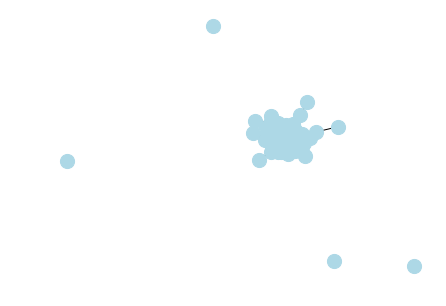

In [546]:
plt.figure(figsize=(7,5))
nx.draw_networkx( g1, with_labels=False, node_size=200, node_color="lightblue" )
plt.axis("off")
plt.show()

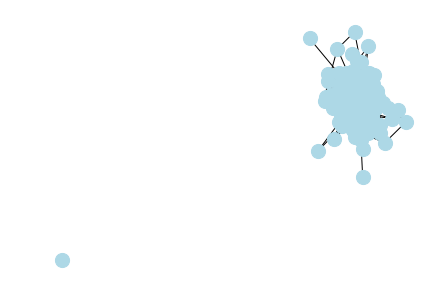

In [547]:
plt.figure(figsize=(7,5))
nx.draw_networkx( g2, with_labels=False, node_size=200, node_color="lightblue" )
plt.axis("off")
plt.show()

# 1. Network construction (b)

Now it is a useful step to create a DataFrames for network1 and network2, to clearly observe a weirhted degree of each node.

In [548]:
dict_degree_1 = dict( g1.degree(weight="weight") )
dict_degree_2 = dict( g2.degree(weight="weight") )


df_degree_1 = pd.DataFrame()
df_degree_1['id_g1'] = dict_degree_1.keys()
df_degree_1['degree_g1'] = dict_degree_1.values()
df_degree_2 = pd.DataFrame()
df_degree_2['id_g2'] = dict_degree_2.keys()
df_degree_2['degree_g2'] = dict_degree_2.values()

#To see the most weirhted nodes I apply sorting.
df_degree_1_sorted = df_degree_1.sort_values(by ='degree_g1', ascending=False)
df_degree_2_sorted = df_degree_2.sort_values(by ='degree_g2', ascending=False)


Here there are table illustration of DataFrames.

In [549]:
df_degree_1_sorted

,id_g1,degree_g1
44,0002091,100
58,0001059,96
116,0001749,94
62,0705356,80
5,0271657,78
30,0748620,77
59,0931247,75
65,0000668,73
31,0000980,68
89,0000307,68


In [550]:
df_degree_2_sorted

,id_g2,degree_g2
146,0000614,99
111,0910278,79
80,0322407,78
130,0000667,74
136,0914612,74
23,0000215,70
120,0342488,69
139,0000246,68
40,0962359,67
89,0942247,66


A task of **Network construction (b)** is removing all isolated nodes in networks. Isolated node - is a node with a degree '0', so I need to find out each this node and delete it.

In [551]:
df_degree_1_sorted.isin([0]).sum()

id_g1        0
degree_g1    4
dtype: int64

In [552]:
df_degree_2_sorted.isin([0]).sum()

id_g2        0
degree_g2    1
dtype: int64

In [553]:
#Removing isolated nodes with the help of DataFrame for network1.
df_degree_null = df_degree_1_sorted [df_degree_1_sorted ['degree_g1'] == 0]
df_degree_1_sorted = df_degree_1_sorted.drop(df_degree_null.index, axis=0)

df_degree_1_sorted.isin([0]).sum()

id_g1        0
degree_g1    0
dtype: int64

In [554]:
#Removing isolated nodes with the help of DataFrame for network2.
df_degree_null = df_degree_2_sorted [df_degree_2_sorted ['degree_g2'] == 0]
df_degree_2_sorted = df_degree_2_sorted.drop(df_degree_null.index, axis=0)

df_degree_2_sorted.isin([0]).sum()

id_g2        0
degree_g2    0
dtype: int64

Here I construct new dictionaries with **id - name** without isolated nodes.

In [555]:
name_1={}
for item in df_degree_1_sorted['id_g1']:
    name_1[item]=name_dict_1[item]
name_2={}
for item in df_degree_2_sorted['id_g2']:
    name_2[item]=name_dict_2[item]

I provide new representation with subgraphs **sg1, sg2** - graphs g1 and g2, but without isolated nodes.

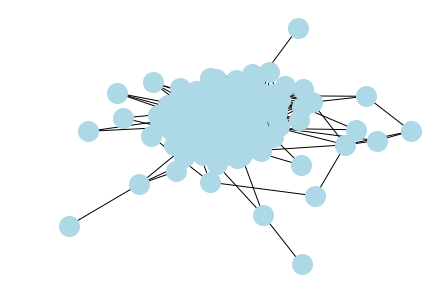

In [556]:
not_null_nodes = df_degree_1_sorted['id_g1']
sg1 = nx.subgraph( g1, not_null_nodes )
plt.figure(figsize=(7,5))
#I use with_labels=False as It will contain a lot of overplotting
#and it will be imposiible to distinct labels.
nx.draw_networkx( sg1, with_labels=False, node_size=400, node_color="lightblue" )
plt.axis("off")
plt.show()

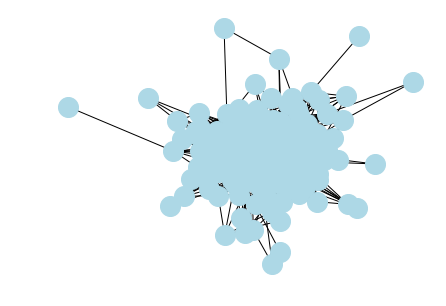

In [557]:
not_null_nodes = df_degree_2_sorted['id_g2']
sg2 = nx.subgraph( g2, not_null_nodes )
plt.figure(figsize=(7,5))
#I use with_labels=False as It will contain a lot of overplotting
#and it will be imposiible to distinct labels.
nx.draw_networkx( sg2, with_labels=False, node_size=400, node_color="lightblue" )
plt.axis("off")
plt.show()

## 2.Network characterisation (a)

The most <strong> basic characterisation </strong> we might perform would be simply to count the number of nodes and edges:

In [558]:
print('Number of nodes in network1, network2: %d, %d' % (sg1.number_of_nodes(), sg2.number_of_nodes() ) )

Number of nodes in network1, network2: 143, 158


In [559]:
print('Number of edges in network1, network2: %d, %d' % (sg1.number_of_edges(), sg2.number_of_edges() ) )

Number of edges in network1, network2: 1284, 1551


To answer the question <strong>how quickly can information be transmitted </strong> across the network, we should consider about <strong>density</strong> and <strong>clustering</strong> coefficients, as it illustrates the connectivity of a network.

In [560]:
print('Density in network1, network2: %.4f, %.4f' % (nx.density(sg1), nx.density(sg2) ) )

Density in network1, network2: 0.1265, 0.1251


If the cleaning - removing all isolated nodes from the networks - has been done successfully, it should be shown that networks have only <strong>one connected component</strong>.

In [561]:
print('Number of connected components in network1, network2: %d, %d' 
      % (nx.number_connected_components(sg1), nx.number_connected_components(sg2) ) )

Number of connected components in network1, network2: 1, 1


Let's count the <strong>average level of concentration of edges</strong> in the neighbourhood of every node with a help of clustering coefficients in network1, network2:

In [562]:
print('Avegare clustering coefficients in network1, network2: %.4f, %.4f' 
      % (nx.average_clustering(sg1),nx.average_clustering(sg2) ) )

Avegare clustering coefficients in network1, network2: 0.2882, 0.3164


## 2.Network characterisation (b)

<h3><strong>Importance of nodes in a network:</strong></h3>

In that weighted networks, each edge has a weight value, which indicates the number of common movies between two actors. We can take these edge weights into account when computing centrality values.

<strong>Degree characterisation</strong> of these two weighted networks:

In [563]:
print('Degree range of network1: [%d, %d]' % (df_degree_1_sorted['degree_g1'].min(), df_degree_1_sorted['degree_g1'].max() ) )
print('Mean degree of network1: %.2f' % df_degree_1_sorted['degree_g1'].mean() )
print('Median degree of network1: %d' % df_degree_1_sorted['degree_g1'].median() )

Degree range of network1: [1, 100]
Mean degree of network1: 27.58
Median degree of network1: 24


In [564]:
print('Degree range of network2: [%d, %d]' % (df_degree_2_sorted['degree_g2'].min(), df_degree_2_sorted['degree_g2'].max() ) )
print('Mean degree of network2: %.2f' % df_degree_2_sorted['degree_g2'].mean() )
print('Median degree of network2: %d' % df_degree_2_sorted['degree_g2'].median() )

Degree range of network2: [1, 99]
Mean degree of network2: 28.77
Median degree of network2: 26


In [565]:
#Here I want to define and visualise 'top' five actors in each network.
t1 = (df_degree_1_sorted['id_g1'].head(5))
t2 = (df_degree_2_sorted['id_g2'].head(5))
print(df_degree_1_sorted.head(5))
print(df_degree_2_sorted.head(5))

name_dict_1_add={}
for char in t1:
    name_dict_1_add[char] = name_dict_1[char]
sg3 = nx.subgraph(sg1, t1)
name_dict_2_add={}
for char in t2:
    name_dict_2_add[char] = name_dict_2[char]
sg4 = nx.subgraph(sg2, t2)

       id_g1  degree_g1
44   0002091        100
58   0001059         96
116  0001749         94
62   0705356         80
5    0271657         78
       id_g2  degree_g2
146  0000614         99
111  0910278         79
80   0322407         78
130  0000667         74
136  0914612         74


According to weighted degree characteristics: in **network1** 'top' actors due to their acting (id): "0002091", "0001059","0001749" ,"0705356" ,"0271657"; in **network2** 'top' actors due to their acting (id): "0000614" ,"0910278" ,"0322407" ,"0000667" ,"0914612".
<p><strong>To make a comparison, the first network has higher weights in its important nodes than the second network - according to top actors.</strong></p>

Let's consider about the connectivity of these **the most important nodes** in following graphs:

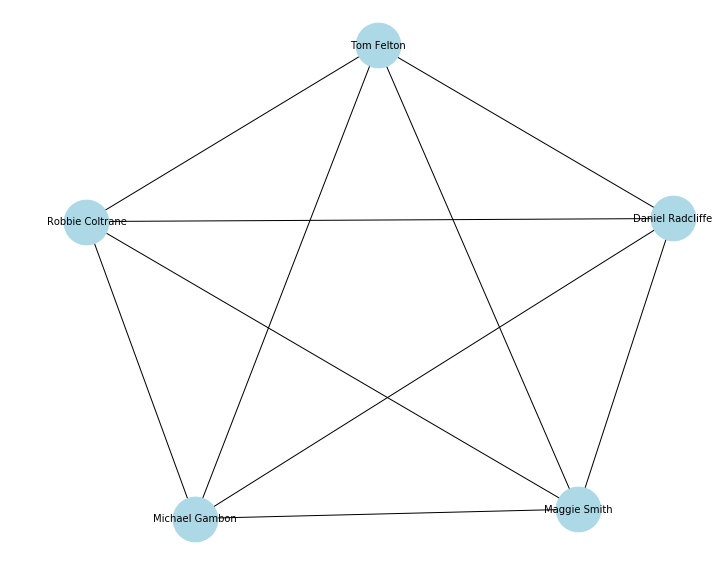

In [566]:
plt.figure(figsize=(12,10))
nx.draw_networkx( sg3, with_labels=True, labels=name_dict_1_add, node_size=2000, node_color="lightblue",font_size = 10 )
plt.axis("off")
plt.show()

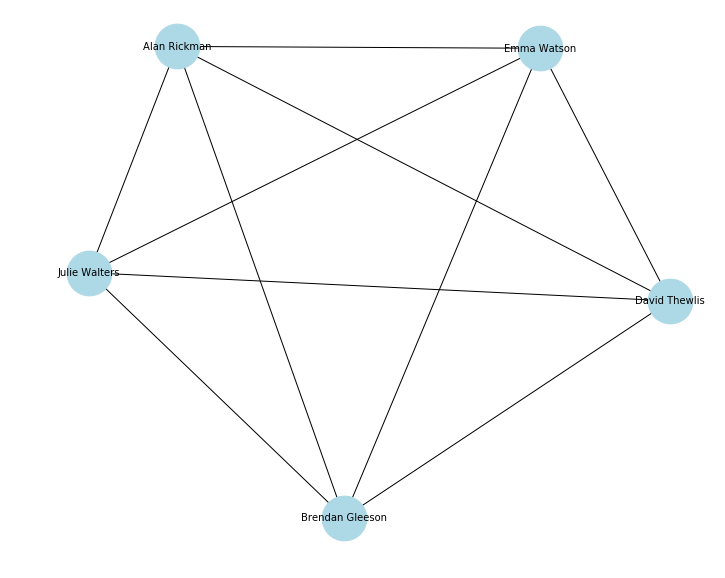

In [567]:
plt.figure(figsize=(12,10))
nx.draw_networkx( sg4, with_labels=True, labels=name_dict_2_add, node_size=2000, node_color="lightblue", font_size = 10 )
plt.axis("off")
plt.show()

These nodes representtions show that our two networks have **similar star topology** in first 5 values.

<h3>Centrality measure of a network:</h3>

<p>Who are the central characters in a co-starring network of movies? Who has been participated in the most movies?</p>
<p>These questions can be answered with the help of <strong>centrality measure.</strong></p> 

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by  (𝑛−1) , where  𝑛  is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [568]:
deg1 = nx.degree_centrality(sg1)
s1 = pd.Series(deg1)
df_centrality_1 = pd.DataFrame(s1,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
df_centrality_1 = df_centrality_1.sort_values(by="degree_centrality",ascending=False).head(10)
#print(df_centrality_1)

deg2 = nx.degree_centrality(sg2)
s2 = pd.Series(deg2)
df_centrality_2 = pd.DataFrame(s2,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
df_centrality_2 = df_centrality_2.sort_values(by="degree_centrality",ascending=False).head(10)
#print(df_centrality_2)

Another measure, **betweenness centrality** can be used to find "brokers" or "bridging" nodes in a network. Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score.

In [569]:
bet1 = nx.betweenness_centrality(sg1)
df_centrality_1["betweenness"] = pd.Series(bet1)
df_centrality_1 = df_centrality_1.head(10)
#print(df_centrality_1)

bet2 = nx.betweenness_centrality(sg2)
df_centrality_2["betweenness"] = pd.Series(bet2)
df_centrality_2 = df_centrality_2.head(10)
#print(df_centrality_2)

**Closeness centrality** measures the extent to which a node is close to all other nodes in a network, either directly or indirectly.

In [570]:
close1 = nx.closeness_centrality(sg1)
df_centrality_1["closeness"] = pd.Series(close1)
df_centrality_1 = df_centrality_1.head(10)
#print(df_centrality_1)

close2 = nx.closeness_centrality(sg2)
df_centrality_2["closeness"] = pd.Series(close2)
df_centrality_2 = df_centrality_2.head(10)
#print(df_centrality_2)

The **eigenvector centrality** of a node proportional to the sum of the centrality scores of its neighbours. This means that a node is important if it connected to other important nodes.

In [571]:
eig1 = nx.eigenvector_centrality(sg1)
df_centrality_1["eigenvector"] = pd.Series(eig1)
df_centrality_1 = df_centrality_1.head(10)
print(df_centrality_1)

eig2 = nx.eigenvector_centrality(sg2)
df_centrality_2["eigenvector"] = pd.Series(eig2)
df_centrality_2 = df_centrality_2.head(10)
print(df_centrality_2)

         degree_centrality  betweenness  closeness  eigenvector
0000553           0.323944     0.043400   0.565737     0.183943
0000658           0.302817     0.033656   0.559055     0.167337
0748620           0.267606     0.031972   0.550388     0.136484
0001416           0.260563     0.022056   0.541985     0.142084
0001570           0.260563     0.018536   0.548263     0.154514
0000980           0.253521     0.014312   0.539924     0.164952
0000668           0.246479     0.014278   0.531835     0.160145
0000321           0.239437     0.021070   0.544061     0.140058
001845            0.239437     0.015796   0.544061     0.134480
0001749           0.239437     0.021426   0.529851     0.139131
         degree_centrality  betweenness  closeness  eigenvector
0000246           0.324841     0.040794   0.590226     0.181853
0000353           0.299363     0.046941   0.575092     0.153799
0000215           0.292994     0.022506   0.570909     0.173545
0004851           0.292994     0.034661 

Text(0.5,1,'Centrality graph 2')

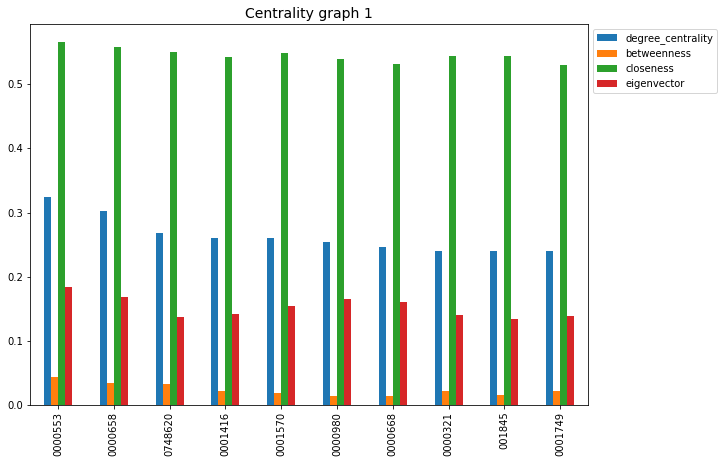

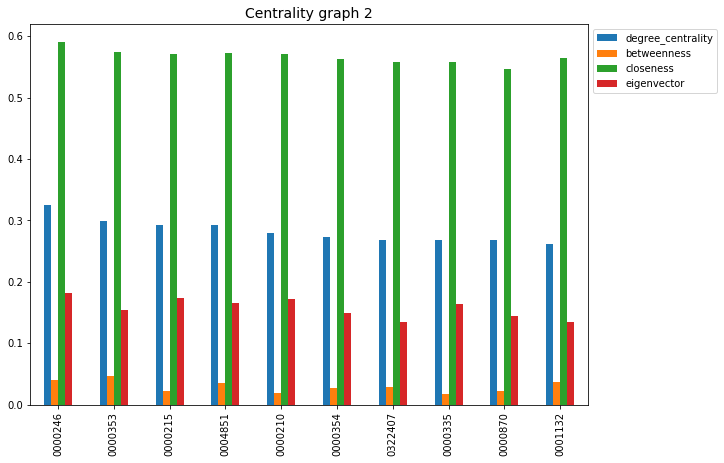

In [572]:
p= df_centrality_1.plot.bar(figsize=(10,7),fontsize=10)
p.legend(loc='best', bbox_to_anchor=(1, 1))
p.set_title("Centrality graph 1",fontsize=14)

p= df_centrality_2.plot.bar(figsize=(10,7),fontsize=10)
p.legend(loc='best', bbox_to_anchor=(1, 1))
p.set_title("Centrality graph 2",fontsize=14)

<p>According to different approaches of centrality measurements: different types of centrality gave slightly different results. As we can see, 10 the most weighted nodes are sorted by degree_centrality in descending order, while betwenness, closeness and eigenvector centralities have other sorting properties(e.g. we observe fluctuation in bar charts behavior).</p>
We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [573]:
print(df_centrality_1.corr())
print(df_centrality_2.corr())

                   degree_centrality  betweenness  closeness  eigenvector
degree_centrality           1.000000     0.886024   0.881432     0.763814
betweenness                 0.886024     1.000000   0.829806     0.459653
closeness                   0.881432     0.829806   1.000000     0.535459
eigenvector                 0.763814     0.459653   0.535459     1.000000
                   degree_centrality  betweenness  closeness  eigenvector
degree_centrality           1.000000     0.545891   0.889327     0.748583
betweenness                 0.545891     1.000000   0.582908    -0.080112
closeness                   0.889327     0.582908   1.000000     0.676261
eigenvector                 0.748583    -0.080112   0.676261     1.000000


For example, it is possible to observe from the **correlation table of network2** that there are some negative values, where betweenness intersects with eigenvector. The reason of that is having opposite behaviour(see on the second bar chart): when the bar for betweenness higher, the respective bar for eigenvector is lower. 

## 3. Ego-centric analysis 

Let's choose important nodes for creating ego-centric networks using betweenness. Here, we can see that for network1 the first node(id='0000553'), while for network2 it's the second node (id='0000353').

In [574]:
ego_node_1 = "0000553"
neigh_list_1 =[]
alters = sg1.neighbors(ego_node_1)
for node in alters:
    neigh_list_1.append(node)
#print(neigh_list_1)

ego_node_2 = "0000353"
neigh_list_2 =[]
alters = sg2.neighbors(ego_node_2)
for node in alters:
    neigh_list_2.append(node)
#print(neigh_list_1)

An **ego network** is a subgraph which consists of a focal node (the ego) and the nodes to whom ego is directly connected (the alters), plus the edges among the alters. 

In [575]:
eg1 = nx.ego_graph( sg1, ego_node_1 )

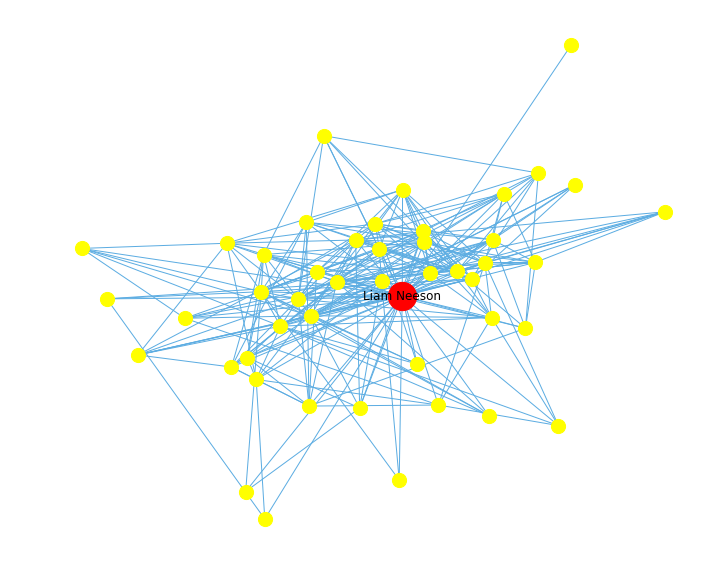

In [576]:
plt.figure(figsize=(12,10))
n1 =name_1['0000553'] 
d1 = {'0000553':n1}
# lay out all nodes
pos1 = nx.spring_layout(sg1)
# draw the full network
nx.draw_networkx(eg1, pos1, with_labels=True,labels=d1, node_size=200, node_color="yellow", font_color ="black",edge_color='#5DADE2')
# draw the ego in red, with larger node size
nx.draw_networkx_nodes(eg1, pos1, nodelist=[ego_node_1], node_size=800, node_color="red")
plt.axis("off")
plt.show()

In [577]:
eg2 = nx.ego_graph( sg2, ego_node_2 )

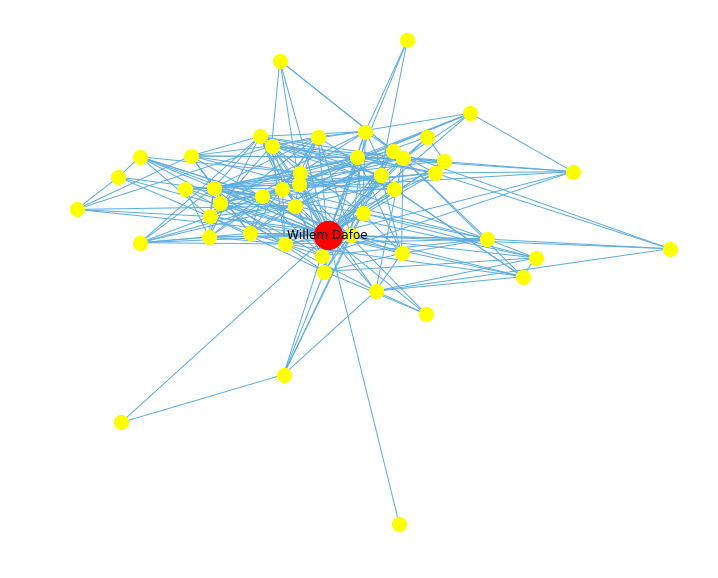

In [578]:
plt.figure(figsize=(12,10))
n2 =name_2['0000353'] 
d2 = {'0000353':n2}
# lay out all nodes
pos2 = nx.spring_layout(sg2)
# draw the full network
nx.draw_networkx(eg2, pos2, with_labels=True,labels=d2, node_size=200, node_color="yellow", font_color ="black",edge_color='#5DADE2')
# draw the ego in red, with larger node size
nx.draw_networkx_nodes(eg2, pos2, nodelist=[ego_node_2], node_size=800, node_color="red")
plt.axis("off")
plt.show()

## 4. Network visualisation

Export networks as a GEXF file:

In [579]:
H1=nx.relabel_nodes(sg1,name_1)
nx.write_gexf(H1, "set3.gexf")

In [580]:
H2=nx.relabel_nodes(sg2,name_2)
nx.write_gexf(H2, "set4.gexf")

**Conclusion**:

I have differently analysed two data sets with the help of visualisation tools in network representations. Overall, these networks are similar as they have similar connectivity(weights of edges are up to 100). So, there are lots of actors that are participated in a great range of movies. The only differences are in centrslity measures that I provided earlier.